In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Read de three .cvs files:
df1=pd.read_csv("Dataset_Inmuebles.xlsx - Inputs_1.csv")
df2=pd.read_csv("Dataset_Inmuebles.xlsx - Inputs_2.csv")
df3=pd.read_csv("Dataset_Inmuebles.xlsx - Inputs_3.csv")

# Merge de three .csv files into one:
data=pd.merge(pd.merge(df1,df2,on='ID'),df3,on='ID')
data=pd.DataFrame(data)


In [3]:
data.head()

,ID,property_type,lat,lon,description,title,price_usd,surface_total,surface_covered,floor,rooms,expenses,barrio,comuna
0,5415,apartment,-346.115.808,-584.101.838,Departamento de 2 ambientes superficie total 5...,Venta Departamento 2 ambientes 52m2 cochera Ap...,100.0k,52,44,NaN,2,NaN,BALVANERA,3
1,1761,apartment,-345.904.453,-58.410.856.200.000.000,Piso de 4 ambientes con dependencia y balcón a...,Guemes y C.Díaz - Piso de 4 c/dependencia en v...,350.0k,111,104,NaN,4,5000.0,PALERMO,14
2,1826,apartment,-345.829.338.033,-584.219.018.513,Living comedor.Dormitorios 1 con placard. Coci...,Venta. Departamento 2 Ambientes. Guemes 4400. ...,93.5k,32,32,NaN,2,NaN,PALERMO,14
3,3410,apartment,-346.149.296,-58.426.629.000.000.000,3 AMBIENTES. CONTRAFRENTE. 55 M2. IMPECABLE. V...,DEPARTAMENTO EN VENTA.|.APARTMENT,140.0k,55,55,3.0,3,1733.0,ALMAGRO,5
4,946,apartment,-34.573.452,-584.615.581,"LIVING/COMEDOR, TOILETTE, 3 DORMITORIOS (SUITE...",VENTA: Importante piso muy alto en torre de ca...,690.0k,185,185,NaN,4,NaN,BELGRANO,13


In [4]:
data.shape

(10567, 14)

In [5]:
# Change the price_usd format from str to float: 100.0k == 100.000
data["price_usd"]=data.price_usd.str.replace("k","00")
data["price_usd"].head()



0    100.000
1    350.000
2     93.500
3    140.000
4    690.000
Name: price_usd, dtype: object

In [6]:
# Convertig the string type of the price_usd column to float type:
data["price_usd"]=data["price_usd"].astype(float)*1000
data["price_usd"]

0        100000.0
1        350000.0
2         93500.0
3        140000.0
4        690000.0
           ...   
10562    112900.0
10563    168000.0
10564     70000.0
10565     73900.0
10566    690000.0
Name: price_usd, Length: 10567, dtype: float64

In [7]:
data["price_usd"].dtypes

dtype('float64')

In [8]:
# Replace the empty (NaN: not numeric number) values of the expenses column with 0: 
data["expenses"]=data["expenses"].fillna(0)
data["expenses"].head()

0       0.0
1    5000.0
2       0.0
3    1733.0
4       0.0
Name: expenses, dtype: float64

## Pregunta 1) 
¿Cuál es el ID del inmueble que requiere mayor gasto/inversión (‘price_usd’ + ‘expenses’) para adquirirlo?

In [10]:
# Sum of the colums price_usd + expenses in a new column called mayor_gastos:
mayor_gasto = data["price_usd"] + data["expenses"]
data["mayor_gasto"]=mayor_gasto
data["mayor_gasto"].head()



0    100000.0
1    355000.0
2     93500.0
3    141733.0
4    690000.0
Name: mayor_gasto, dtype: float64

In [11]:
# Row del inmueble que requiere mayor gasto (price_usd + expenses):
inm_mayor_gasto = data.nlargest(1, "mayor_gasto", keep="all")
#print(inm_mayor_gasto)

In [12]:
# 1) ID del inmueble con mayor gasto (price_usd + expenses):
print("ID del inmueble con mayor gasto (price + expenses): ")
inm_mayor_gasto[["ID","mayor_gasto"]]

ID del inmueble con mayor gasto (price + expenses): 


,ID,mayor_gasto
7111,6528,11111111.0


## Pregunta 2)
Cual es el ID de la casa (‘house’) que tiene una superficie descubierta de al menos 800 m 2 y su valor (‘price_usd’) es el más barato?

In [15]:
# Create new column with the surface_uncovered (surface_total - surface_covered):
surface_uncovered = data["surface_total"] - data["surface_covered"]
data["surface_uncovered"]=surface_uncovered
data["surface_uncovered"].head()
#data.head()


0    8
1    7
2    0
3    0
4    0
Name: surface_uncovered, dtype: int64

In [16]:
# Number unique values in the property_type column to see how many types of propertys there are:
unq=data.property_type.nunique()
print("There are {} property types in the dataset" .format(unq))

There are 2 property types in the dataset


In [17]:
# Fill the empty values in property_type with the information of the title column: 

#data["title"]

# Extract from the column title the words APARTMENT or HOUSE using regex, and put it in a new column called types:
data["types"]=data["title"].str.extract("(APARTMENT$|HOUSE$)", expand=True)
#data["types"]

# Then replace the words APARTMENT and HOUSE with apartment and house in the same types column: 
data["types"]=data.types.str.replace("APARTMENT","apartment")
data["types"]=data.types.str.replace("HOUSE","house")
data["types"].iloc[10:30]




10        house
11    apartment
12    apartment
13    apartment
14    apartment
15    apartment
16    apartment
17    apartment
18    apartment
19    apartment
20    apartment
21    apartment
22        house
23    apartment
24    apartment
25    apartment
26    apartment
27    apartment
28        house
29    apartment
Name: types, dtype: object

In [18]:
# Fill the property_type column with the types column:

#data["property_type"].iloc[177:223]
data["property_type"]=data["property_type"].fillna(data["types"])
data["property_type"].iloc[177:223]

177    apartment
178    apartment
179    apartment
180        house
181    apartment
182    apartment
183    apartment
184    apartment
185    apartment
186    apartment
187    apartment
188    apartment
189    apartment
190    apartment
191        house
192    apartment
193    apartment
194    apartment
195    apartment
196    apartment
197    apartment
198    apartment
199    apartment
200    apartment
201    apartment
202    apartment
203    apartment
204    apartment
205    apartment
206    apartment
207    apartment
208    apartment
209    apartment
210    apartment
211    apartment
212    apartment
213    apartment
214    apartment
215    apartment
216    apartment
217    apartment
218        house
219    apartment
220    apartment
221    apartment
222        house
Name: property_type, dtype: object

In [19]:
# Create dataframe with only de property_type == "house":
data_house=data.loc[data["property_type"] == "house"]
#data_house

In [22]:
# From the data_house select only the ones that are surface_uncovered >= 800, by creating a new dataframe house_800:
house_800=data_house.loc[data_house["surface_uncovered"]>=800]
#house_800

In [24]:
# 2) From the house_800 I only select the smallest price_usd value: 

house_800_menor = house_800.nsmallest(1, "price_usd", keep="all")
#house_800_menor
#print(house_800_menor[["ID","price_usd"]])
print("ID de la casa más barata con más de 800m2:") 
house_800_menor[["ID","price_usd"]]

ID de la casa más barata con más de 800m2:


,ID,price_usd
8323,2903,150000.0


## Pregunta 3)
Obtener el TOP de las 3 propiedades más caras, para cada tipo de
propiedad.

In [25]:
# Create a dataset with only de property_type == "apartment":

data_apart=data.loc[data["property_type"] == "apartment"]
#data_apart

In [27]:
# 3) From the data_house and data_apart I only select the first three biggest price_usd values:
top_house=data_house.nlargest(3, "price_usd", keep="first")
top_apart=data_apart.nlargest(3, "price_usd", keep="all")
print("Top 3 de las casas más caras:", top_house[["ID", "price_usd"]])
print("Top 3 de lss departamentos más caros:", top_apart[["ID", "price_usd"]])

Top 3 de las casas más caras:         ID  price_usd
7293  2836  3500000.0
7210  2329  3200000.0
7974   380  3100000.0
Top 3 de lss departamentos más caros:         ID   price_usd
7111  6528  11111111.0
5744   753   5500000.0
4952  2977   4520000.0


## Pregunta 4)
Obtener el valor promedio de las propiedades para cada barrio.

In [28]:
# Number of barrios in the dataframe: 
print("There are {} barrios in the dataframe" .format(data.barrio.nunique()))

There are 48 barrios in the dataframe


In [32]:
group_barrios = data.groupby("barrio", as_index=False)['price_usd'].mean()

# To get the values of the group COLEGIALES: group_barrios.get_group("COLEGIALES")
print("Listado ascendente del precipo promedio de las propiedades a la venta por barrio:")
group_barrios.sort_values(["price_usd"])


Listado ascendente del precipo promedio de las propiedades a la venta por barrio:


,barrio,price_usd
46,VILLA SOLDATI,6.483330e+04
39,VILLA LUGANO,1.250000e+05
30,SAN CRISTOBAL,1.273321e+05
24,PARQUE PATRICIOS,1.340763e+05
11,CONSTITUCION,1.344862e+05
5,BOCA,1.417386e+05
18,NUEVA POMPEYA,1.466038e+05
2,BALVANERA,1.482360e+05
13,FLORESTA,1.512433e+05
44,VILLA RIACHUELO,1.533333e+05


## Pregunta 5)
¿Cuál es la comuna con más propiedades a la venta?

In [33]:
# Number of comunas in the dataframe: 
print("There are {} comunas in the dataframe" .format(data.comuna.nunique()))

There are 15 comunas in the dataframe


In [34]:
comunas_n = data.groupby("comuna", as_index=False).size()
print("Cantidad de propiedades a la venta por comuna:")
comunas_n

Cantidad de propiedades a la venta por comuna:


,comuna,size
0,1,1306
1,2,1145
2,3,682
3,4,304
4,5,514
5,6,551
6,7,526
7,8,77
8,9,224
9,10,406


In [35]:
print("La comuna que tiene más propiedades a la venta es:")
comunas_n.nlargest(1, "size", keep="all")

La comuna que tiene más propiedades a la venta es:


,comuna,size
13,14,1693


## Pregunta 6)
¿Cuál es el barrio con mayor costo promedio por metro cuadrado cubierto?


In [36]:
precio_m2 = data["price_usd"]/data["surface_covered"]
data["precio_m2"] = precio_m2


In [37]:
barrio_m2 = data.groupby("barrio", as_index=False)['precio_m2'].mean()

print("Listado ascendente del promedio del precio/m2 por barrio:")
barrio_m2.sort_values(["precio_m2"])

Listado ascendente del promedio del precio/m2 por barrio:


,barrio,precio_m2
46,VILLA SOLDATI,925.612644
39,VILLA LUGANO,1283.756191
44,VILLA RIACHUELO,1654.451885
21,PARQUE AVELLANEDA,1820.071312
5,BOCA,1978.170403
15,MATADEROS,2019.473815
11,CONSTITUCION,2033.222045
33,VELEZ SARSFIELD,2073.191785
13,FLORESTA,2098.304532
24,PARQUE PATRICIOS,2102.978963


In [38]:
print("El barrio que tiene mayor precio/m2 es:")
barrio_m2.nlargest(1, "precio_m2", keep="all")

El barrio que tiene mayor precio/m2 es:


,barrio,precio_m2
26,PUERTO MADERO,6705.915406


## Al margen:

In [39]:
# Cantidad de valores faltantes:
data.isnull().sum()

ID                      0
property_type           0
lat                     0
lon                     0
description             0
title                   0
price_usd               0
surface_total           0
surface_covered         0
floor                8850
rooms                   0
expenses                0
barrio                  0
comuna                  0
mayor_gasto             0
surface_uncovered       0
types                   0
precio_m2               0
dtype: int64

In [40]:
# Cantidad de cuentas por tipo de propiedad: 
data["property_type"].value_counts()

apartment    9771
house         796
Name: property_type, dtype: int64

[Text(0, 0, 'apartment'), Text(1, 0, 'house')]

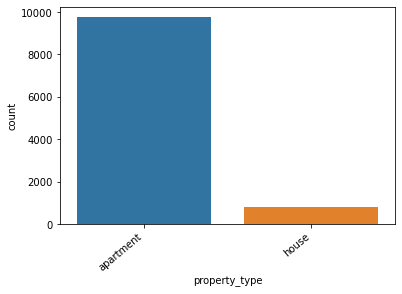

In [41]:
ax = sns.countplot(data = data, x = "property_type")
ax.set_xticklabels(ax.get_xticklabels(),rotation=40,ha="right")


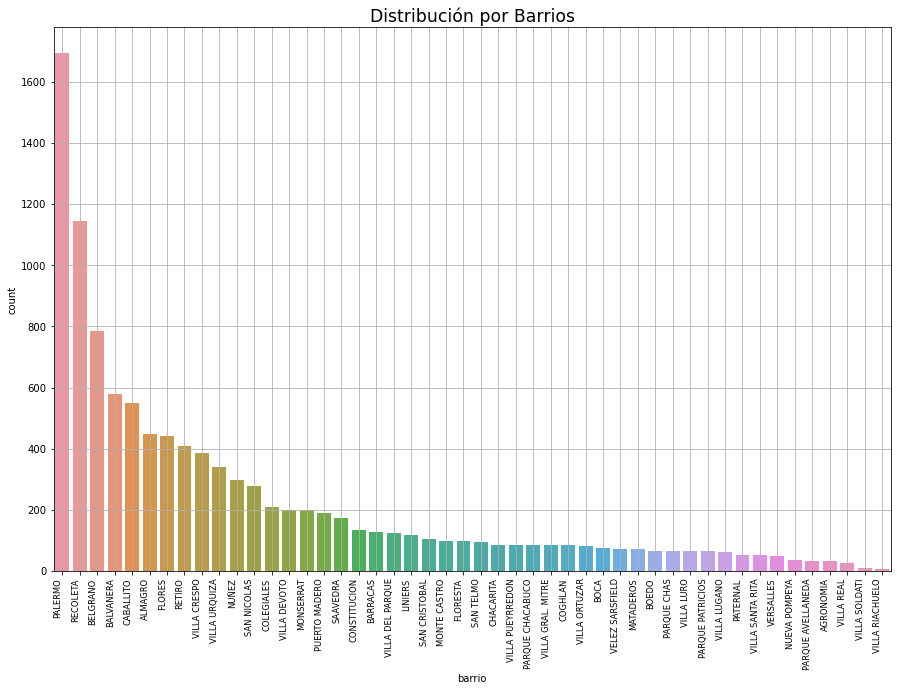

In [42]:
# Distribución de la cantidad de propiedades por barrio:

plt.figure(figsize=(15,10))
ax1=sns.countplot(data=data, x="barrio", order=data["barrio"].value_counts().index)
ax1.set_title("Distribución por Barrios", fontsize="xx-large")
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90, ha="right", fontsize="small")
ax1.grid()
plt.show()

In [43]:
data.columns

Index(['ID', 'property_type', 'lat', 'lon', 'description', 'title',
       'price_usd', 'surface_total', 'surface_covered', 'floor', 'rooms',
       'expenses', 'barrio', 'comuna', 'mayor_gasto', 'surface_uncovered',
       'types', 'precio_m2'],
      dtype='object')

In [44]:
data.describe()

,ID,price_usd,surface_total,surface_covered,floor,rooms,expenses,comuna,mayor_gasto,surface_uncovered,precio_m2
count,10567.000000,1.056700e+04,10567.000000,10567.000000,1717.000000,10567.000000,10567.000000,10567.000000,1.056700e+04,10567.000000,10567.000000
mean,5283.000000,3.043262e+05,134.342103,114.104192,11.588235,3.022618,1196.804959,8.272925,3.055230e+05,20.237910,3368.911314
std,3050.574481,3.712658e+05,1821.969121,1483.252298,59.039495,1.674473,3338.527528,5.132624,3.722129e+05,375.861502,5882.717983
min,0.000000,5.043000e+03,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,5.043000e+03,0.000000,1.233333
25%,2641.500000,1.240000e+05,48.000000,43.000000,2.000000,2.000000,0.000000,3.000000,1.245000e+05,0.000000,2334.429825
50%,5283.000000,1.890000e+05,74.000000,66.000000,4.000000,3.000000,0.000000,9.000000,1.900000e+05,4.000000,2940.000000
75%,7924.500000,3.400000e+05,126.000000,112.000000,8.000000,4.000000,0.000000,13.000000,3.400000e+05,10.000000,3632.028790
max,10566.000000,1.111111e+07,184000.000000,150000.000000,904.000000,30.000000,40000.000000,15.000000,1.111111e+07,34000.000000,260000.000000


In [45]:
data.dtypes

ID                     int64
property_type         object
lat                   object
lon                   object
description           object
title                 object
price_usd            float64
surface_total          int64
surface_covered        int64
floor                float64
rooms                  int64
expenses             float64
barrio                object
comuna                 int64
mayor_gasto          float64
surface_uncovered      int64
types                 object
precio_m2            float64
dtype: object

In [46]:
data.head()

,ID,property_type,lat,lon,description,title,price_usd,surface_total,surface_covered,floor,rooms,expenses,barrio,comuna,mayor_gasto,surface_uncovered,types,precio_m2
0,5415,apartment,-346.115.808,-584.101.838,Departamento de 2 ambientes superficie total 5...,Venta Departamento 2 ambientes 52m2 cochera Ap...,100000.0,52,44,NaN,2,0.0,BALVANERA,3,100000.0,8,apartment,2272.727273
1,1761,apartment,-345.904.453,-58.410.856.200.000.000,Piso de 4 ambientes con dependencia y balcón a...,Guemes y C.Díaz - Piso de 4 c/dependencia en v...,350000.0,111,104,NaN,4,5000.0,PALERMO,14,355000.0,7,apartment,3365.384615
2,1826,apartment,-345.829.338.033,-584.219.018.513,Living comedor.Dormitorios 1 con placard. Coci...,Venta. Departamento 2 Ambientes. Guemes 4400. ...,93500.0,32,32,NaN,2,0.0,PALERMO,14,93500.0,0,apartment,2921.875000
3,3410,apartment,-346.149.296,-58.426.629.000.000.000,3 AMBIENTES. CONTRAFRENTE. 55 M2. IMPECABLE. V...,DEPARTAMENTO EN VENTA.|.APARTMENT,140000.0,55,55,3.0,3,1733.0,ALMAGRO,5,141733.0,0,apartment,2545.454545
4,946,apartment,-34.573.452,-584.615.581,"LIVING/COMEDOR, TOILETTE, 3 DORMITORIOS (SUITE...",VENTA: Importante piso muy alto en torre de ca...,690000.0,185,185,NaN,4,0.0,BELGRANO,13,690000.0,0,apartment,3729.729730


In [47]:
data.drop(labels=["description", "title", "types"], axis=1)

,ID,property_type,lat,lon,price_usd,surface_total,surface_covered,floor,rooms,expenses,barrio,comuna,mayor_gasto,surface_uncovered,precio_m2
0,5415,apartment,-346.115.808,-584.101.838,100000.0,52,44,NaN,2,0.0,BALVANERA,3,100000.0,8,2272.727273
1,1761,apartment,-345.904.453,-58.410.856.200.000.000,350000.0,111,104,NaN,4,5000.0,PALERMO,14,355000.0,7,3365.384615
2,1826,apartment,-345.829.338.033,-584.219.018.513,93500.0,32,32,NaN,2,0.0,PALERMO,14,93500.0,0,2921.875000
3,3410,apartment,-346.149.296,-58.426.629.000.000.000,140000.0,55,55,3.0,3,1733.0,ALMAGRO,5,141733.0,0,2545.454545
4,946,apartment,-34.573.452,-584.615.581,690000.0,185,185,NaN,4,0.0,BELGRANO,13,690000.0,0,3729.729730
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10562,431,apartment,-34.556.834,-5.845.995.500.000.000,112900.0,39,36,1.0,1,0.0,BELGRANO,13,112900.0,3,3136.111111
10563,5580,apartment,-3.460.287.476,-5.841.070.938,168000.0,73,62,10.0,2,0.0,BALVANERA,3,168000.0,11,2709.677419
10564,7470,apartment,-3.460.404.260.000.000,-58.383.418.500.000.000,70000.0,23,23,NaN,1,1400.0,SAN NICOLAS,1,71400.0,0,3043.478261
10565,5323,apartment,-346.150.319.346,-584.047.450.392,73900.0,32,32,NaN,1,0.0,BALVANERA,3,73900.0,0,2309.375000


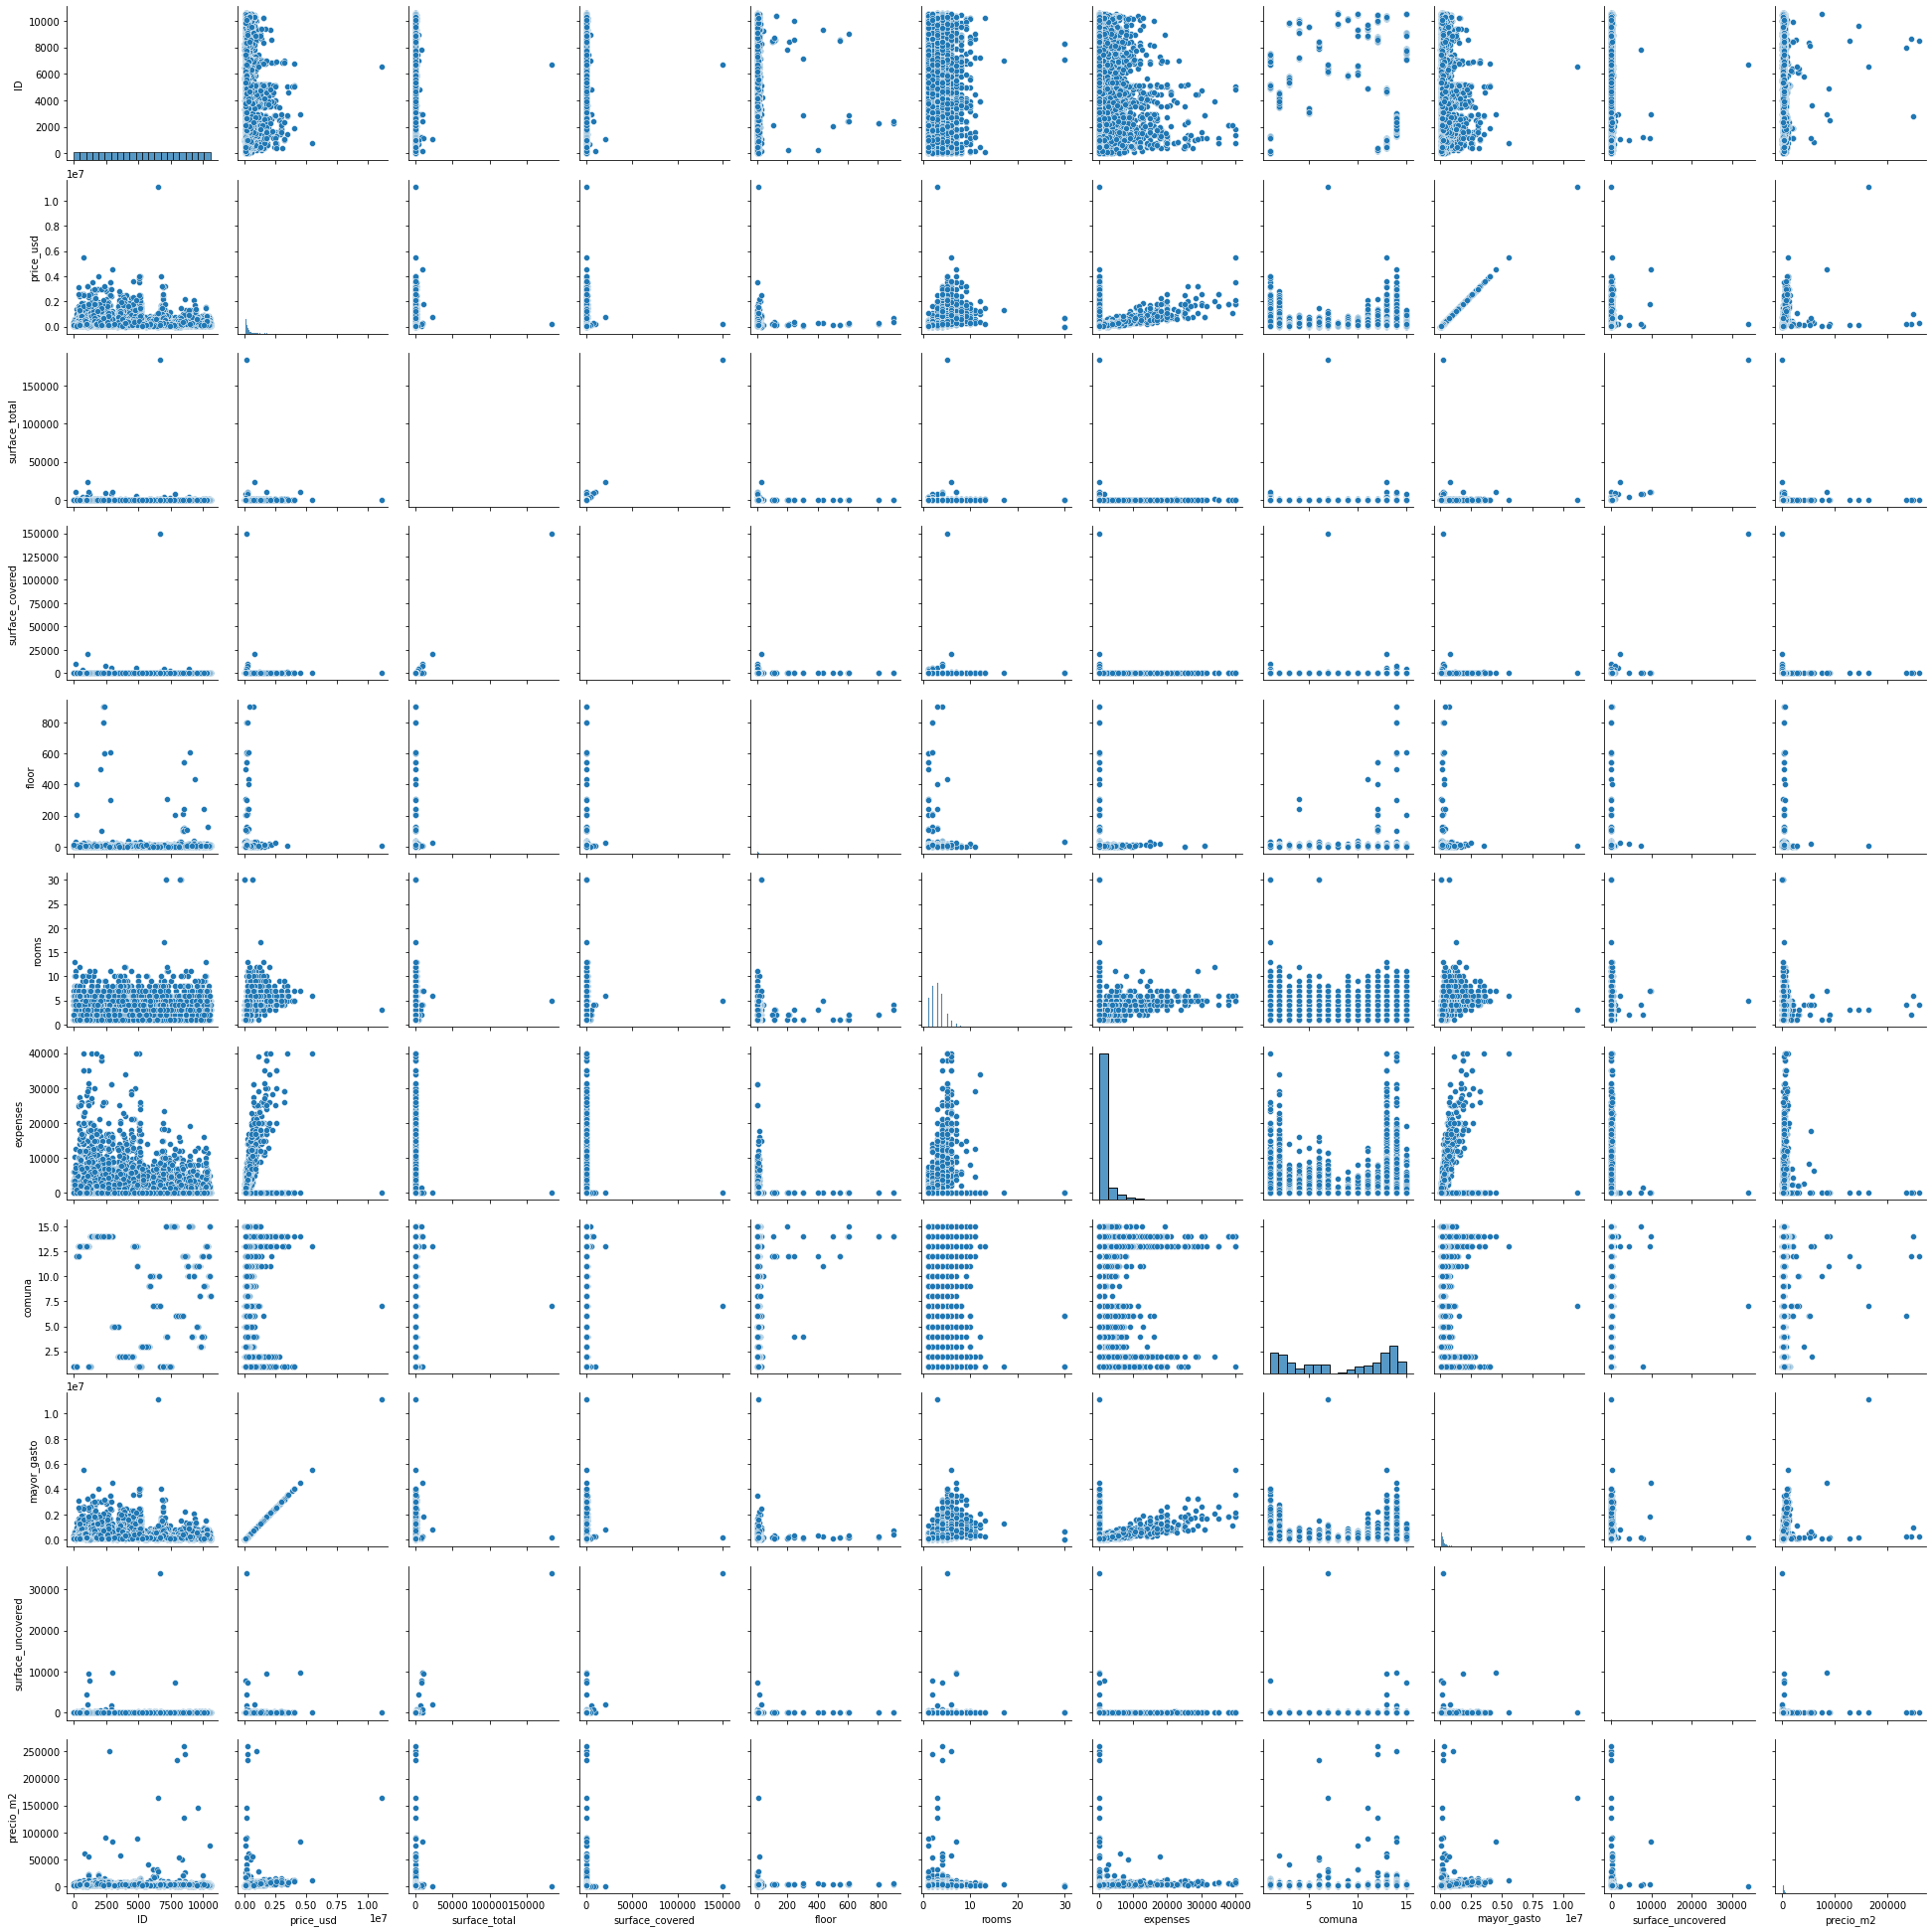

In [48]:
sns.pairplot(data)

<AxesSubplot:>

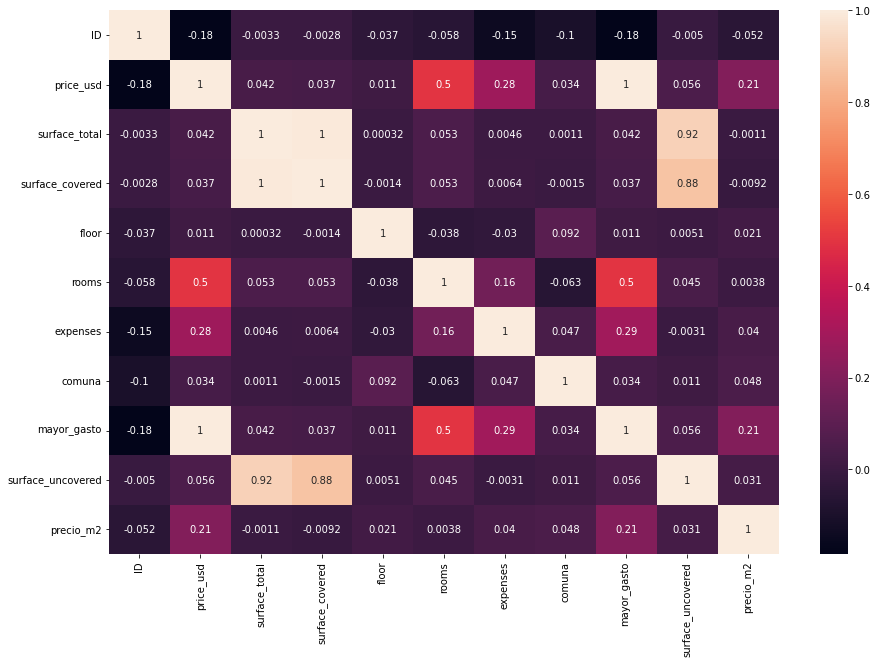

In [49]:
plt.figure(figsize=(15,10))
sns.heatmap(data.corr(), annot=True)


<AxesSubplot:title={'center':'Surface_Covered'}, xlabel='surface_covered'>

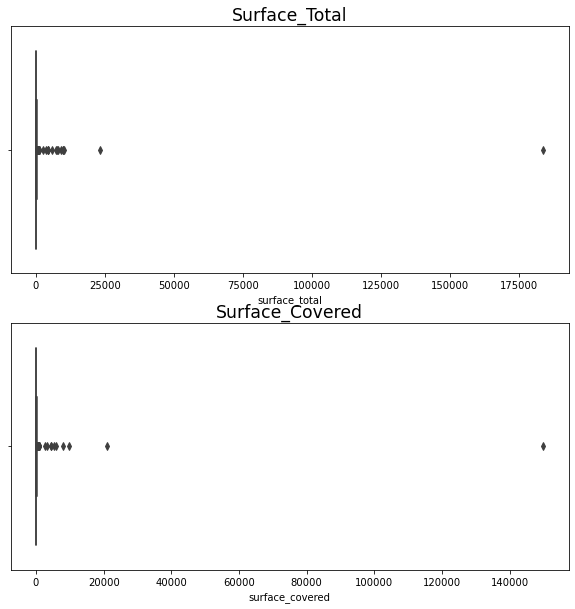

In [50]:
fig, (s1, s2) = plt.subplots(2, figsize=(10,10))
s1.set_title("Surface_Total", fontsize="xx-large")
s2.set_title("Surface_Covered", fontsize="xx-large")

sns.boxplot(x=data["surface_total"], ax=s1)
sns.boxplot(x=data["surface_covered"], ax=s2)

# Se pueden ver datos outliers

In [51]:
# Drop the rows with index 5040 and 5592 because they are outliers:

data.nlargest(3, "surface_total", keep="all")
data = data.drop(data.index[[5040, 5592]], axis=0)

In [52]:
data.nlargest(3, "surface_total", keep="all")

,ID,property_type,lat,lon,description,title,price_usd,surface_total,surface_covered,floor,rooms,expenses,barrio,comuna,mayor_gasto,surface_uncovered,types,precio_m2
7067,1124,house,-345.727.682.531,-58.460.661.555.600.000,"Venta de Casa 7 AMBIENTES O MAS en Belgrano R,...",CASA EN VENTA.|.HOUSE,1800000.0,10000,550,NaN,7,0.0,BELGRANO,13,1800000.0,9450,house,3272.727273
1792,132,apartment,-34.612.819,-58.378.795.999.999.900,Corredor Responsable: Juan Carlos Treco - CUCI...,"MONSERRAT-Semipiso 4 amb, excelente ubicación....",220000.0,9878,9878,5.0,4,0.0,MONSERRAT,1,220000.0,0,apartment,22.271715
4952,2977,apartment,-34.577.253.595.500.000,-584.249.601.349,espectacular depto con ista al frenteESTAS PRO...,Departamento - Palermo.|.APARTMENT,4520000.0,9874,54,NaN,7,0.0,PALERMO,14,4520000.0,9820,apartment,83703.703704


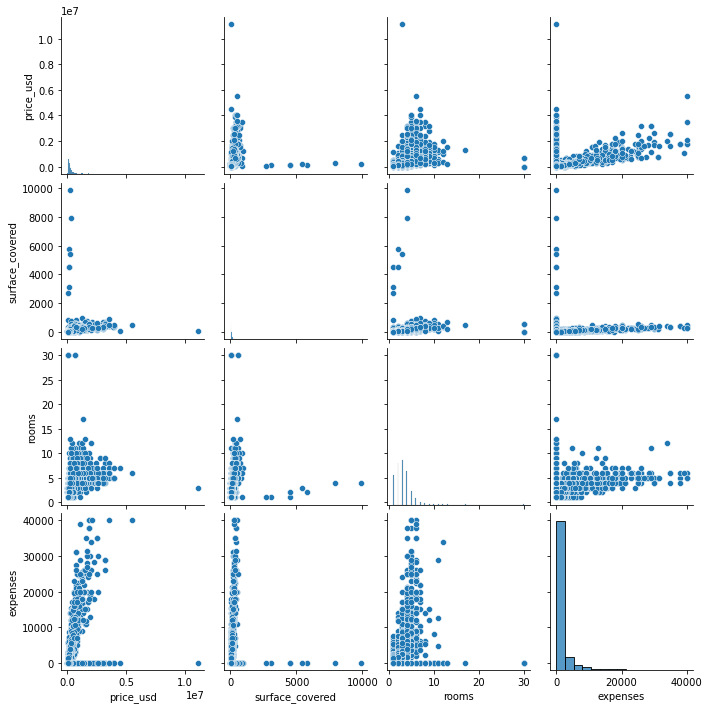

In [56]:
sns.pairplot(data, vars=["price_usd", "surface_covered", "rooms", "expenses"])